In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
app_data=pd.read_csv('C:/Users/user/Downloads/application_data.csv')
app_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
app_data.shape

(307511, 122)

In [5]:
#check list of features which has nan values in app_data
app_null_features = [features for features in app_data.columns if app_data[features].isnull().sum()>1]
app_null_features

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',

In [6]:
len(app_null_features)

66

In [7]:
#printing missing values percentage of those features {from app_null_features}
for features in app_null_features:
    print()
    print(features,np.round(app_data[features].isnull().mean()*100,4),'--> % missing values of app_data')


AMT_ANNUITY 0.0039 --> % missing values of app_data

AMT_GOODS_PRICE 0.0904 --> % missing values of app_data

NAME_TYPE_SUITE 0.4201 --> % missing values of app_data

OWN_CAR_AGE 65.9908 --> % missing values of app_data

OCCUPATION_TYPE 31.3455 --> % missing values of app_data

CNT_FAM_MEMBERS 0.0007 --> % missing values of app_data

EXT_SOURCE_1 56.3811 --> % missing values of app_data

EXT_SOURCE_2 0.2146 --> % missing values of app_data

EXT_SOURCE_3 19.8253 --> % missing values of app_data

APARTMENTS_AVG 50.7497 --> % missing values of app_data

BASEMENTAREA_AVG 58.516 --> % missing values of app_data

YEARS_BEGINEXPLUATATION_AVG 48.781 --> % missing values of app_data

YEARS_BUILD_AVG 66.4978 --> % missing values of app_data

COMMONAREA_AVG 69.8723 --> % missing values of app_data

ELEVATORS_AVG 53.296 --> % missing values of app_data

ENTRANCES_AVG 50.3488 --> % missing values of app_data

FLOORSMAX_AVG 49.7608 --> % missing values of app_data

FLOORSMIN_AVG 67.8486 --> % missi

In [8]:
for feature in app_data:
    per = app_data[feature].isnull().sum()/len(app_data)*100
    if int(per) > 30.0000:
        app_data.drop([feature],axis=1,inplace=True)

In [9]:
app_data.shape

(307511, 72)

In [10]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#numarical features
numarical_features = [feature for feature in app_data.columns if app_data[feature].dtypes != 'O' ]
print('number of numarical features: ',len(numarical_features))
#visualize the numarical features
app_data[numarical_features].head()

number of numarical features:  61


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#temporal features
year_features = [feature for feature in numarical_features if 'YEARS' in feature or 'YEAR' in feature]
year_features

['AMT_REQ_CREDIT_BUREAU_YEAR']

In [13]:
year_data=app_data[year_features]
year_data

,AMT_REQ_CREDIT_BUREAU_YEAR
0,1.0
1,0.0
2,0.0
3,NaN
4,0.0
...,...
307506,NaN
307507,NaN
307508,1.0
307509,0.0


In [14]:
discrete_features = [feature for feature in numarical_features if len(app_data[feature].unique())<25 and feature not in year_features]
print('Discrete features count: {}'.format(len(discrete_features)))

Discrete features count: 44


In [15]:
continuous_features = [feature for feature in numarical_features if feature not in discrete_features+year_features]
print('continuous features count {}'.format(len(continuous_features)))

continuous features count 16


In [16]:
num_data=app_data[numarical_features]
num_data

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,15,0,0,0,0,0,0,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,8,0,0,0,0,0,0,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,9,0,0,0,0,1,1,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,2.0,2,2,9,0,0,0,1,1,0,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
des_data=app_data[discrete_features]
des_data

,TARGET,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_QRT
0,1,0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,0,0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,0,0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,0,0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,0,0,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,1,1,0,1,0,0,1.0,1,1,15,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
307507,0,0,1,0,0,1,1,0,1.0,2,2,8,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
307508,0,0,1,1,0,1,0,1,1.0,3,3,9,0,0,0,0,1,1,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0
307509,1,0,1,1,0,1,0,0,2.0,2,2,9,0,0,0,1,1,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [18]:
con_data=app_data[continuous_features]
con_data

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON
0,100002,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,0.262949,0.139376,2.0,2.0,-1134.0,0.0
1,100003,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,0.622246,NaN,1.0,1.0,-828.0,0.0
2,100004,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,0.555912,0.729567,0.0,0.0,-815.0,0.0
3,100006,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,0.650442,NaN,2.0,2.0,-617.0,NaN
4,100007,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,0.322738,NaN,0.0,0.0,-1106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,0.681632,NaN,0.0,0.0,-273.0,NaN
307507,456252,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,0.115992,NaN,0.0,0.0,0.0,NaN
307508,456253,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,0.535722,0.218859,6.0,6.0,-1909.0,1.0
307509,456254,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,0.514163,0.661024,0.0,0.0,-322.0,0.0


In [19]:
con_data.isnull().sum()

SK_ID_CURR                        0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_MON     41519
dtype: int64

In [20]:
con_data.fillna(con_data.median(),inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [21]:
con_data.isnull().sum()

SK_ID_CURR                    0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OBS_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DAYS_LAST_PHONE_CHANGE        0
AMT_REQ_CREDIT_BUREAU_MON     0
dtype: int64

In [22]:
des_data.isnull().sum()

TARGET                             0
CNT_CHILDREN                       0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
DEF_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_7                    0
FLAG_DOCUMENT_8                    0
F

In [23]:
des_data.fillna(des_data.median(),inplace=True)

In [24]:
des_data.isnull().sum()

TARGET                         0
CNT_CHILDREN                   0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
DEF_30_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUM

In [25]:

cate_data = [feature for feature in app_data.columns if app_data[feature].dtypes == 'O' ]
print('number of categorical features: ',len(cate_data))


number of categorical features:  11


In [26]:
catego_data=app_data[cate_data]
catego_data

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,THURSDAY,Services
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,MONDAY,XNA
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,THURSDAY,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 1


In [27]:
catego_data.isnull().sum()

NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
WEEKDAY_APPR_PROCESS_START       0
ORGANIZATION_TYPE                0
dtype: int64

In [28]:
catego_data.fillna(catego_data.mode().loc[0],inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [29]:
catego_data.isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [30]:
lst=[year_data,des_data,con_data,catego_data]

In [31]:
dataset = pd.concat(lst,axis=1)

In [32]:
dataset.shape

(307511, 72)

In [33]:
dataset.head()

,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_QRT,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1.0,1,0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,100002,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,0.262949,0.139376,2.0,2.0,-1134.0,0.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,0.0,0,0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,100003,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,0.622246,0.535276,1.0,1.0,-828.0,0.0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY,School
2,0.0,0,0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,100004,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,0.555912,0.729567,0.0,0.0,-815.0,0.0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,NaN,0,0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,100006,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,0.650442,0.535276,2.0,2.0,-617.0,0.0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
4,0.0,0,0,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,100007,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,0.322738,0.535276,0.0,0.0,-1106.0,0.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion


In [34]:
dataset.isnull().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    41519
TARGET                            0
CNT_CHILDREN                      0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
                              ...  
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
Length: 72, dtype: int64

In [35]:
print('missing values percentage in AMT_REQ_CREDIT_BUREAU_YEAR: ',app_data[features].isnull().mean()*100)

missing values percentage in AMT_REQ_CREDIT_BUREAU_YEAR:  13.501630835970097


In [36]:
year_data.fillna(year_data.median(),inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [37]:
year_data.isnull().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [38]:
lst=[year_data,des_data,con_data,catego_data]

In [39]:
dataset = pd.concat(lst,axis=1)

In [40]:
dataset.head()

,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_QRT,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1.0,1,0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,100002,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,0.262949,0.139376,2.0,2.0,-1134.0,0.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,0.0,0,0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,100003,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,0.622246,0.535276,1.0,1.0,-828.0,0.0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY,School
2,0.0,0,0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,100004,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,0.555912,0.729567,0.0,0.0,-815.0,0.0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,1.0,0,0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,100006,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,0.650442,0.535276,2.0,2.0,-617.0,0.0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
4,0.0,0,0,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,100007,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,0.322738,0.535276,0.0,0.0,-1106.0,0.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion


In [41]:
dataset.isnull().any()

AMT_REQ_CREDIT_BUREAU_YEAR    False
TARGET                        False
CNT_CHILDREN                  False
FLAG_MOBIL                    False
FLAG_EMP_PHONE                False
                              ...  
NAME_EDUCATION_TYPE           False
NAME_FAMILY_STATUS            False
NAME_HOUSING_TYPE             False
WEEKDAY_APPR_PROCESS_START    False
ORGANIZATION_TYPE             False
Length: 72, dtype: bool

In [42]:
dataset.shape

(307511, 72)

In [43]:
dataset.head(2)

,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_QRT,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1.0,1,0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,100002,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,0.262949,0.139376,2.0,2.0,-1134.0,0.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,0.0,0,0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,100003,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,0.622246,0.535276,1.0,1.0,-828.0,0.0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY,School


In [44]:
con_data.shape

(307511, 16)

SK_ID_CURR


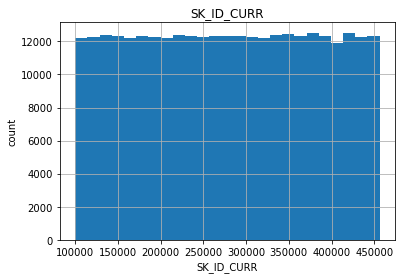

AMT_INCOME_TOTAL


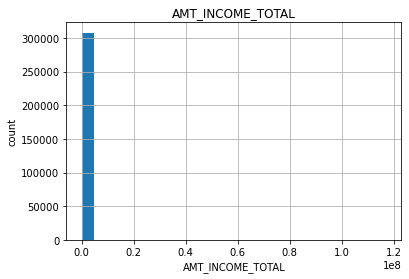

AMT_CREDIT


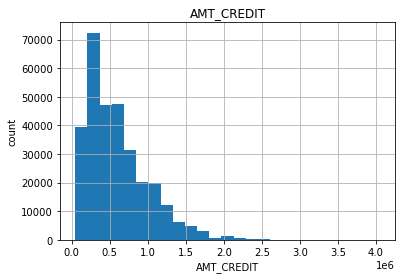

AMT_ANNUITY


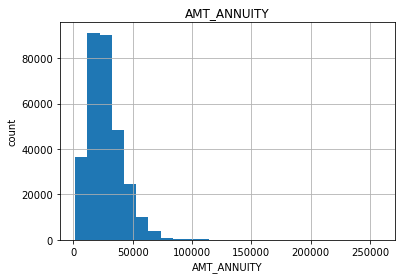

AMT_GOODS_PRICE


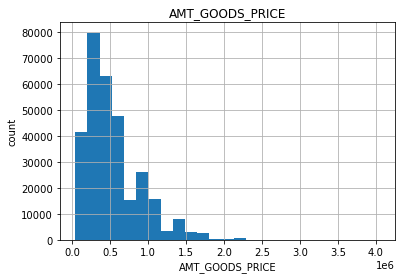

REGION_POPULATION_RELATIVE


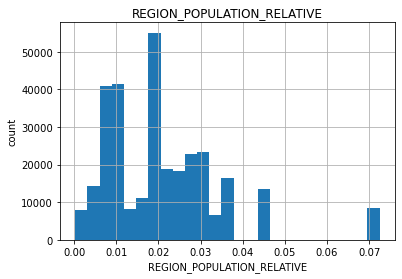

DAYS_BIRTH


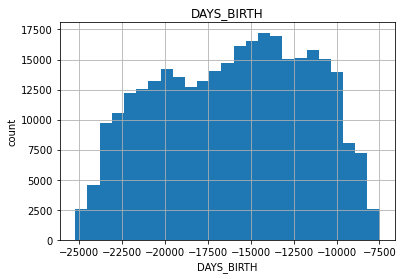

DAYS_EMPLOYED


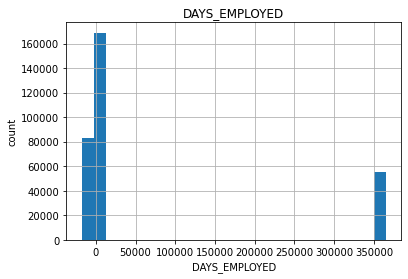

DAYS_REGISTRATION


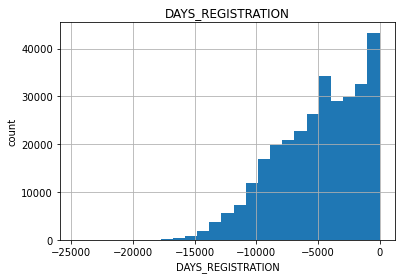

DAYS_ID_PUBLISH


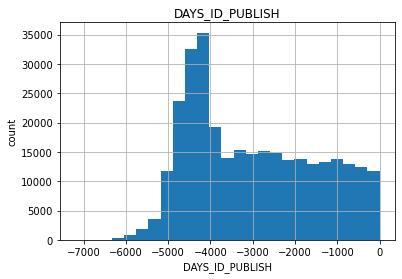

EXT_SOURCE_2


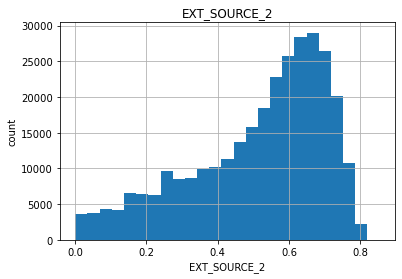

EXT_SOURCE_3


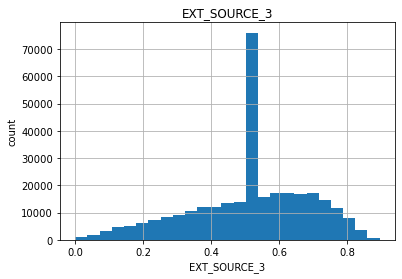

OBS_30_CNT_SOCIAL_CIRCLE


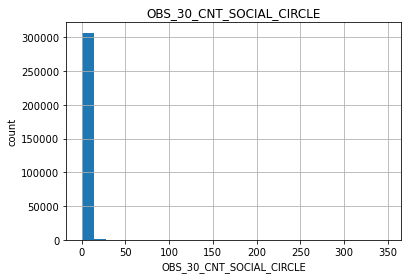

OBS_60_CNT_SOCIAL_CIRCLE


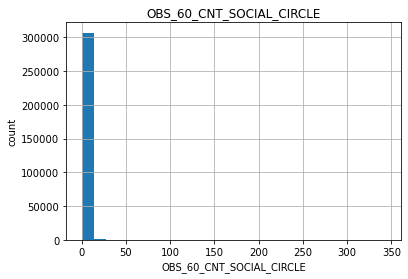

DAYS_LAST_PHONE_CHANGE


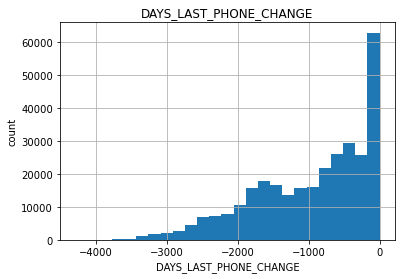

AMT_REQ_CREDIT_BUREAU_MON


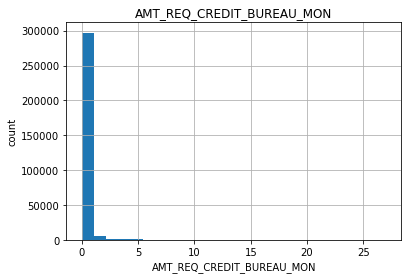

In [45]:
for feature in con_data:
    print(feature)
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

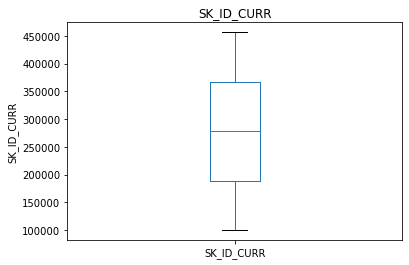

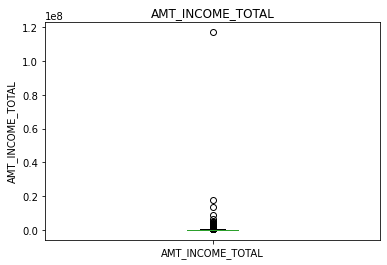

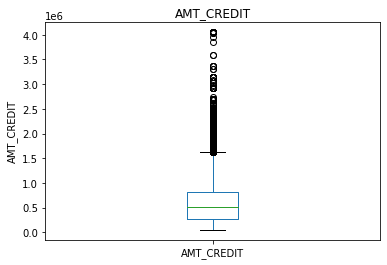

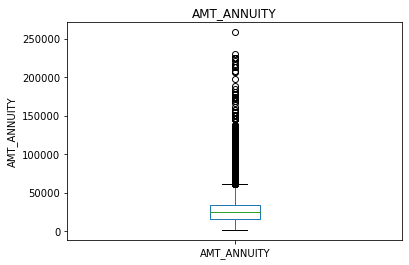

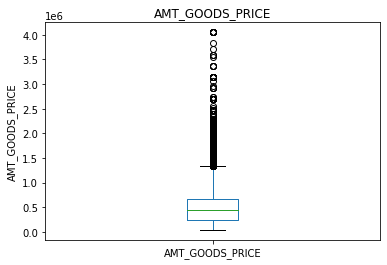

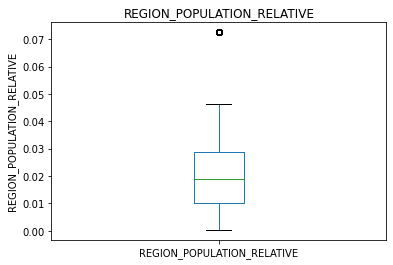

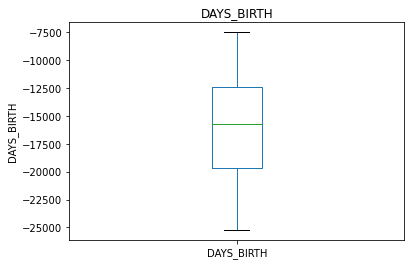

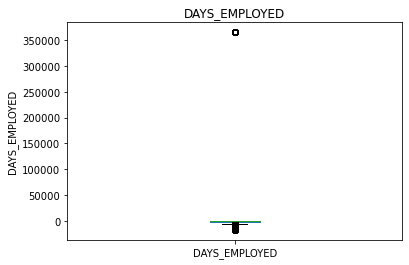

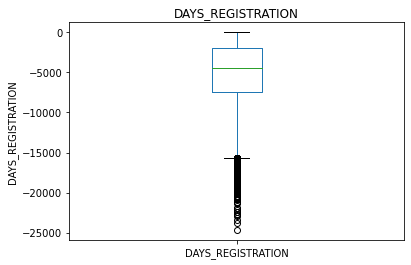

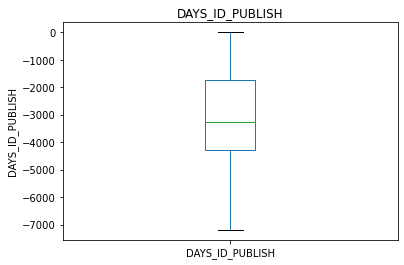

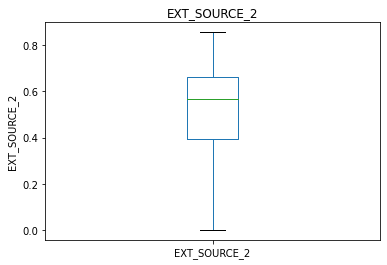

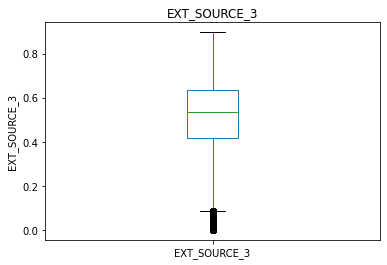

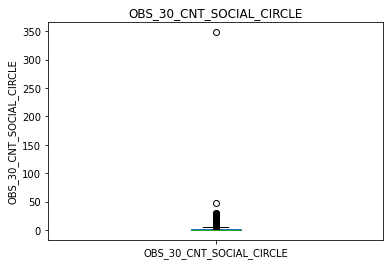

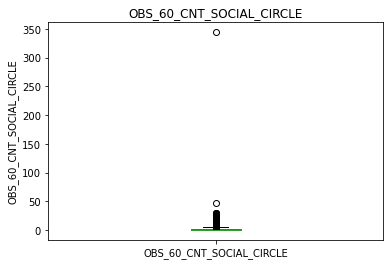

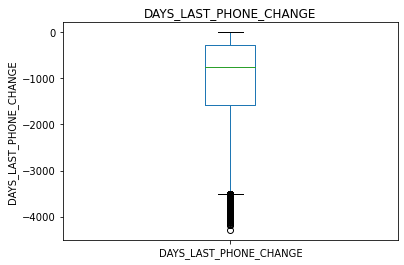

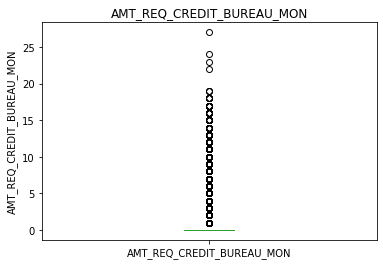

In [46]:
for feature in con_data:
    dataset.boxplot(column =feature,grid = False) 
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [47]:
for feature in catego_data:
    print()
    print('The feature is  ->  {} and number of categories are  --->  {}'.format(feature,dataset[feature].unique()))
    print('The feature is  ->  {} and number of categories are  --->  {}'.format(feature,dataset[feature].nunique()))


The feature is  ->  NAME_CONTRACT_TYPE and number of categories are  --->  ['Cash loans' 'Revolving loans']
The feature is  ->  NAME_CONTRACT_TYPE and number of categories are  --->  2

The feature is  ->  CODE_GENDER and number of categories are  --->  ['M' 'F' 'XNA']
The feature is  ->  CODE_GENDER and number of categories are  --->  3

The feature is  ->  FLAG_OWN_CAR and number of categories are  --->  ['N' 'Y']
The feature is  ->  FLAG_OWN_CAR and number of categories are  --->  2

The feature is  ->  FLAG_OWN_REALTY and number of categories are  --->  ['Y' 'N']
The feature is  ->  FLAG_OWN_REALTY and number of categories are  --->  2

The feature is  ->  NAME_TYPE_SUITE and number of categories are  --->  ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
The feature is  ->  NAME_TYPE_SUITE and number of categories are  --->  7

The feature is  ->  NAME_INCOME_TYPE and number of categories are  --->  ['Working' 'State servant' 'Commerc

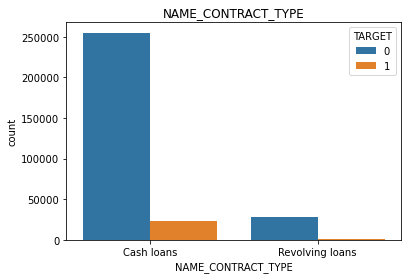

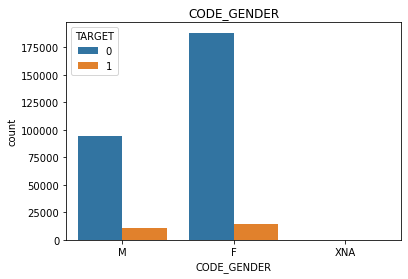

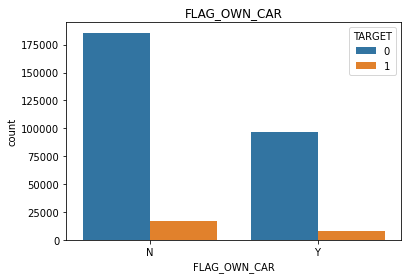

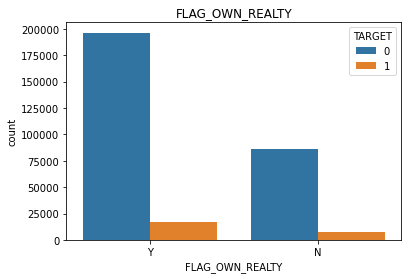

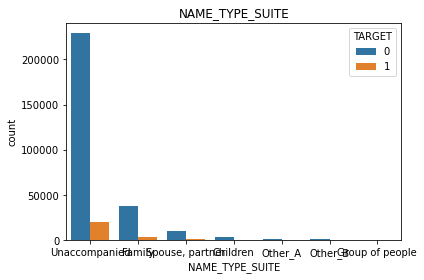

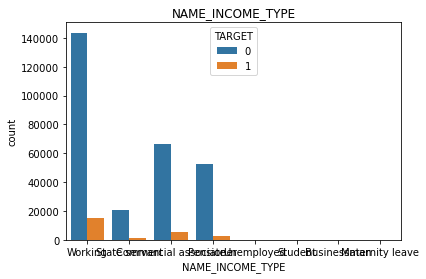

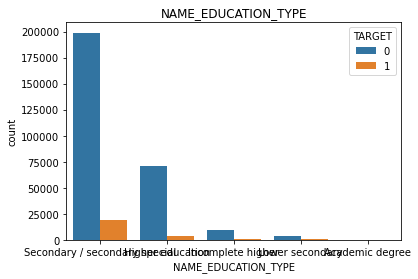

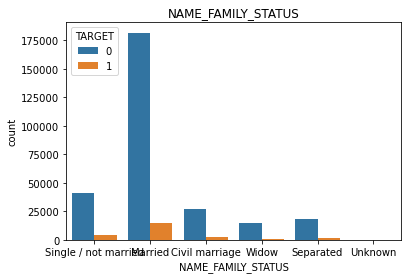

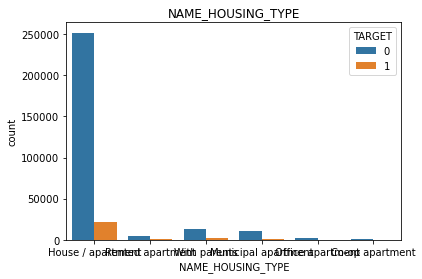

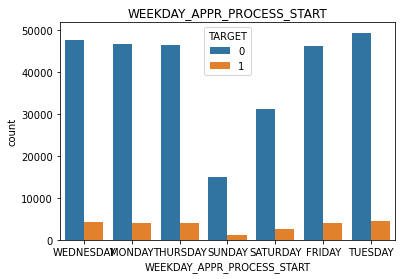

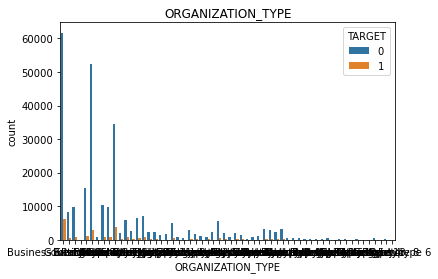

In [48]:
for feature in catego_data:
    sns.countplot(x=feature,hue='TARGET',data=dataset)
    plt.xlabel(feature)
    #plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [49]:
con_data.shape

(307511, 16)

In [50]:
con_data.describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,5.145034e-01,0.515695,1.417523,1.400626,-962.858119,0.231293
std,102790.175348,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,1.908699e-01,0.174736,2.398395,2.377224,826.807226,0.856810
min,100002.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,8.173617e-08,0.000527,0.000000,0.000000,-4292.000000,0.000000
25%,189145.500000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,3.929737e-01,0.417100,0.000000,0.000000,-1570.000000,0.000000
50%,278202.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,5.659614e-01,0.535276,0.000000,0.000000,-757.000000,0.000000
75%,367142.500000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,6.634218e-01,0.636376,2.000000,2.000000,-274.000000,0.000000
max,456255.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,8.549997e-01,0.896010,348.000000,344.000000,0.000000,27.000000


In [51]:
Q1 = con_data.quantile(0.25)
Q3 = con_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SK_ID_CURR                    177997.000000
AMT_INCOME_TOTAL               90000.000000
AMT_CREDIT                    538650.000000
AMT_ANNUITY                    18072.000000
AMT_GOODS_PRICE               441000.000000
REGION_POPULATION_RELATIVE         0.018657
DAYS_BIRTH                      7269.000000
DAYS_EMPLOYED                   2471.000000
DAYS_REGISTRATION               5469.500000
DAYS_ID_PUBLISH                 2579.000000
EXT_SOURCE_2                       0.270448
EXT_SOURCE_3                       0.219277
OBS_30_CNT_SOCIAL_CIRCLE           2.000000
OBS_60_CNT_SOCIAL_CIRCLE           2.000000
DAYS_LAST_PHONE_CHANGE          1296.000000
AMT_REQ_CREDIT_BUREAU_MON          0.000000
dtype: float64


In [52]:
lower_limit = Q1 - (1.5*IQR)
lower_limit

SK_ID_CURR                    -77850.000000
AMT_INCOME_TOTAL              -22500.000000
AMT_CREDIT                   -537975.000000
AMT_ANNUITY                   -10584.000000
AMT_GOODS_PRICE              -423000.000000
REGION_POPULATION_RELATIVE        -0.017980
DAYS_BIRTH                    -30585.500000
DAYS_EMPLOYED                  -6466.500000
DAYS_REGISTRATION             -15683.750000
DAYS_ID_PUBLISH                -8167.500000
EXT_SOURCE_2                      -0.012698
EXT_SOURCE_3                       0.088185
OBS_30_CNT_SOCIAL_CIRCLE          -3.000000
OBS_60_CNT_SOCIAL_CIRCLE          -3.000000
DAYS_LAST_PHONE_CHANGE         -3514.000000
AMT_REQ_CREDIT_BUREAU_MON          0.000000
dtype: float64

In [53]:
upper_limit = Q3 + (1.5*IQR)
upper_limit

SK_ID_CURR                    6.341380e+05
AMT_INCOME_TOTAL              3.375000e+05
AMT_CREDIT                    1.616625e+06
AMT_ANNUITY                   6.170400e+04
AMT_GOODS_PRICE               1.341000e+06
REGION_POPULATION_RELATIVE    5.664850e-02
DAYS_BIRTH                   -1.509500e+03
DAYS_EMPLOYED                 3.417500e+03
DAYS_REGISTRATION             6.194250e+03
DAYS_ID_PUBLISH               2.148500e+03
EXT_SOURCE_2                  1.069094e+00
EXT_SOURCE_3                  9.652909e-01
OBS_30_CNT_SOCIAL_CIRCLE      5.000000e+00
OBS_60_CNT_SOCIAL_CIRCLE      5.000000e+00
DAYS_LAST_PHONE_CHANGE        1.670000e+03
AMT_REQ_CREDIT_BUREAU_MON     0.000000e+00
dtype: float64

In [54]:
#for feature in con_data:
 #   print((dataset[feature] > lower_limit))
type(lower_limit)    
    

pandas.core.series.Series

In [55]:
type(con_data)

pandas.core.frame.DataFrame

In [62]:
def outlier_detection(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    l_bound = q1 - 1.5 * iqr
    u_bound = q3 + 1.5 * iqr
    print('Column Name',col)
    print('Lower Bound is :',l_bound)
    print('Upper Bound is :',u_bound)
    outliers = [val for val in df[col] if val < l_bound or val > u_bound]
    print('Length of Outliers :',len(outliers))
    print("percentage:",len(outliers)/len(df[col])*100)
    return '*****************************************'

In [63]:
for col in con_data.columns:
    print(outlier_detection(con_data,col))

Column Name SK_ID_CURR
Lower Bound is : -77850.0
Upper Bound is : 634138.0
Length of Outliers : 0
percentage: 0.0
*****************************************
Column Name AMT_INCOME_TOTAL
Lower Bound is : -22500.0
Upper Bound is : 337500.0
Length of Outliers : 14035
percentage: 4.564064374932929
*****************************************
Column Name AMT_CREDIT
Lower Bound is : -537975.0
Upper Bound is : 1616625.0
Length of Outliers : 6562
percentage: 2.13390740493836
*****************************************
Column Name AMT_ANNUITY
Lower Bound is : -10584.0
Upper Bound is : 61704.0
Length of Outliers : 7504
percentage: 2.4402379101885785
*****************************************
Column Name AMT_GOODS_PRICE
Lower Bound is : -423000.0
Upper Bound is : 1341000.0
Length of Outliers : 14728
percentage: 4.789422167011912
*****************************************
Column Name REGION_POPULATION_RELATIVE
Lower Bound is : -0.017979500000000002
Upper Bound is : 0.056648500000000004
Length of Outliers 

In [67]:
def outlier_detection(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    l_bound = q1 - 1.5 * iqr
    u_bound = q3 + 1.5 * iqr
    print('Column Name',col)
    print('Lower Bound is :',l_bound)
    print('Upper Bound is :',u_bound)
    outliers = [val for val in df[col] if val < l_bound or val > u_bound]
    
    print("percentage:",len(outliers)/len(df[col])*100)
    df[col]=df[col].apply(lambda x:l_bound if x<l_bound else(u_bound if x>u_bound else x))
    print('Length of Outliers :',len(outliers))
    return '*****************************************'

In [68]:
con_data.shape

(307511, 16)

In [74]:
catego_data.shape

(307511, 11)

In [80]:
catego_data.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [93]:
for feature in catego_data:
    print(feature," :  ",len(catego_data[feature].unique()))

NAME_CONTRACT_TYPE  :   2
CODE_GENDER  :   3
FLAG_OWN_CAR  :   2
FLAG_OWN_REALTY  :   2
NAME_TYPE_SUITE  :   7
NAME_INCOME_TYPE  :   8
NAME_EDUCATION_TYPE  :   5
NAME_FAMILY_STATUS  :   6
NAME_HOUSING_TYPE  :   6
WEEKDAY_APPR_PROCESS_START  :   7
ORGANIZATION_TYPE  :   58


In [96]:
for feature in catego_data:
    print()
    print(feature," :  ",(catego_data[feature].unique()))


NAME_CONTRACT_TYPE  :   ['Cash loans' 'Revolving loans']

CODE_GENDER  :   ['M' 'F' 'XNA']

FLAG_OWN_CAR  :   ['N' 'Y']

FLAG_OWN_REALTY  :   ['Y' 'N']

NAME_TYPE_SUITE  :   ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']

NAME_INCOME_TYPE  :   ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

NAME_EDUCATION_TYPE  :   ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS  :   ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

NAME_HOUSING_TYPE  :   ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

WEEKDAY_APPR_PROCESS_START  :   ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']

ORGANIZATION_TYPE  :   ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 

In [102]:
catego_data.drop(['ORGANIZATION_TYPE'],axis=1,inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [105]:
catego_data.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')

In [106]:
for feature in catego_data:
    print()
    print(feature," :  ",(catego_data[feature].unique()))


NAME_CONTRACT_TYPE  :   ['Cash loans' 'Revolving loans']

CODE_GENDER  :   ['M' 'F' 'XNA']

FLAG_OWN_CAR  :   ['N' 'Y']

FLAG_OWN_REALTY  :   ['Y' 'N']

NAME_TYPE_SUITE  :   ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']

NAME_INCOME_TYPE  :   ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

NAME_EDUCATION_TYPE  :   ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS  :   ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

NAME_HOUSING_TYPE  :   ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

WEEKDAY_APPR_PROCESS_START  :   ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']


In [107]:
name_type_suite = {'Unaccompanied':1,'Family':2,'Spouse, partner':3,'Children':4,'Other_A':5,'Other_B':6,'Group of people':7}

In [108]:
catego_data['NAME_TYPE_SUITE_ord'] =catego_data.NAME_TYPE_SUITE.map(name_type_suite)

<ipython-input-108-6580bcf163fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catego_data['NAME_TYPE_SUITE_ord'] =catego_data.NAME_TYPE_SUITE.map(name_type_suite)


In [111]:
NAME_INCOME_TYPE_ord = {'Working':1, 'State servant':2, 'Commercial associate':3, 'Pensioner':4, 'Unemployed':5,
'Student':6,'Businessman':7, 'Maternity leave':8}

In [112]:
catego_data['INCOME_TYPE_ord'] =catego_data.NAME_INCOME_TYPE.map(NAME_INCOME_TYPE_ord)

<ipython-input-112-afc7a4be59a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catego_data['INCOME_TYPE_ord'] =catego_data.NAME_INCOME_TYPE.map(NAME_INCOME_TYPE_ord)


In [115]:
#NAME_EDUCATION_TYPE  :   ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
#'Lower secondary' 'Academic degree']
EDUCATION_TYPE_ord = {'Secondary / secondary special':1, 'Higher education':2, 'Incomplete higher':3,
'Lower secondary':4, 'Academic degree':5}

In [116]:
catego_data['EDUCATION_TYPE_ord'] =catego_data.NAME_EDUCATION_TYPE.map(EDUCATION_TYPE_ord)

<ipython-input-116-18d414f59f25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catego_data['EDUCATION_TYPE_ord'] =catego_data.NAME_EDUCATION_TYPE.map(EDUCATION_TYPE_ord)


In [128]:
#NAME_FAMILY_STATUS  :   ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
# 'Unknown']
NAME_FAMILY_STATUS_ord = {'Single / not married':1, 'Married':2, 'Civil marriage':3, 'Widow':4 ,'Separated':5,
'Unknown':6}
catego_data['NAME_FAMILY_STATUS_ord'] =catego_data.NAME_FAMILY_STATUS.map(NAME_FAMILY_STATUS_ord)

<ipython-input-128-a88c850193c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catego_data['NAME_FAMILY_STATUS_ord'] =catego_data.NAME_FAMILY_STATUS.map(NAME_FAMILY_STATUS_ord)


In [131]:
#NAME_HOUSING_TYPE  :   ['House / apartment' 'Rented apartment' 'With parents'
#'Municipal apartment' 'Office apartment' 'Co-op apartment']
NAME_HOUSING_TYPE_ord = {'House / apartment':1,'Rented apartment':2,'With parents':3,
'Municipal apartment':4 ,'Office apartment':5, 'Co-op apartment':6}
catego_data['NAME_HOUSING_TYPE_ord '] =catego_data.NAME_HOUSING_TYPE.map(NAME_HOUSING_TYPE_ord)

<ipython-input-131-6c33585fb234>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catego_data['NAME_HOUSING_TYPE_ord '] =catego_data.NAME_HOUSING_TYPE.map(NAME_HOUSING_TYPE_ord)


In [134]:
#WEEKDAY_APPR_PROCESS_START  :   ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
WEEKDAY_APPR_PROCESS_START_ord = {'WEDNESDAY':1, 'MONDAY':2, 'THURSDAY':3, 'SUNDAY':4, 'SATURDAY':5 ,'FRIDAY':6, 'TUESDAY':7}
catego_data['WEEKDAY_APPR_PROCESS_START_ord '] =catego_data.WEEKDAY_APPR_PROCESS_START.map(WEEKDAY_APPR_PROCESS_START_ord)

<ipython-input-134-095f326c569e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catego_data['WEEKDAY_APPR_PROCESS_START_ord '] =catego_data.WEEKDAY_APPR_PROCESS_START.map(WEEKDAY_APPR_PROCESS_START_ord)


In [135]:
catego_data.shape

(307511, 16)

In [140]:
"""NAME_CONTRACT_TYPE  :   ['Cash loans' 'Revolving loans']

CODE_GENDER  :   ['M' 'F' 'XNA']

FLAG_OWN_CAR  :   ['N' 'Y']

FLAG_OWN_REALTY  :   ['Y' 'N']"""

name_contract_type = {'Cash loans':1,'Revolving loans':2 }
catego_data['name_contract_type'] =catego_data.NAME_CONTRACT_TYPE.map(name_contract_type)

GENDER = {'M':1,'F':2,'XNA':2}
catego_data['GENDER'] =catego_data.CODE_GENDER.map(GENDER)

flag_own_car = {'N':1, 'Y':2}
catego_data['flag_own_car'] =catego_data.FLAG_OWN_CAR.map(flag_own_car)

FLAG_OWN_REALTY_ord = {'Y':1,'N':2}
catego_data['FLAG_OWN_REALTY_ord'] =catego_data.FLAG_OWN_REALTY.map(FLAG_OWN_REALTY_ord)



<ipython-input-140-b63d7d180f26>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catego_data['name_contract_type'] =catego_data.NAME_CONTRACT_TYPE.map(name_contract_type)
<ipython-input-140-b63d7d180f26>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catego_data['GENDER'] =catego_data.CODE_GENDER.map(GENDER)
<ipython-input-140-b63d7d180f26>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [142]:
catego_data.shape

(307511, 20)

In [143]:
catego_data.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_TYPE_SUITE_ord,INCOME_TYPE_ord,EDUCATION_TYPE_ord,NAME_FAMILY_STATUS_ord,NAME_HOUSING_TYPE_ord,WEEKDAY_APPR_PROCESS_START_ord,name_contract_type,GENDER,flag_own_car,FLAG_OWN_REALTY_ord
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,1,1,1,1,1,1,1,1,1,1
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY,2,2,2,2,1,2,1,2,1,2
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,1,1,1,1,1,2,2,1,2,1
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,1,1,1,3,1,1,1,2,1,1
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,1,1,1,1,1,3,1,1,1,1


In [144]:
catego_data.drop(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'WEEKDAY_APPR_PROCESS_START'],axis=1,inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [145]:
catego_data.head()

,NAME_TYPE_SUITE_ord,INCOME_TYPE_ord,EDUCATION_TYPE_ord,NAME_FAMILY_STATUS_ord,NAME_HOUSING_TYPE_ord,WEEKDAY_APPR_PROCESS_START_ord,name_contract_type,GENDER,flag_own_car,FLAG_OWN_REALTY_ord
0,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,1,2,1,2,1,2
2,1,1,1,1,1,2,2,1,2,1
3,1,1,1,3,1,1,1,2,1,1
4,1,1,1,1,1,3,1,1,1,1


In [146]:
con_data.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON
0,100002,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,0.262949,0.139376,2.0,2.0,-1134.0,0.0
1,100003,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,0.622246,0.535276,1.0,1.0,-828.0,0.0
2,100004,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,0.555912,0.729567,0.0,0.0,-815.0,0.0
3,100006,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,0.650442,0.535276,2.0,2.0,-617.0,0.0
4,100007,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,0.322738,0.535276,0.0,0.0,-1106.0,0.0


In [147]:
des_data.head()

,TARGET,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_QRT
0,1,0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,0,0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,0,0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,0,0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,0,0,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [149]:
print(catego_data.shape)
print(con_data.shape)
print(des_data.shape)

(307511, 10)
(307511, 16)
(307511, 44)


In [153]:
type(des_data)

pandas.core.frame.DataFrame

In [160]:
DATA= pd.concat([catego_data,con_data,des_data],axis=1)
DATA

,NAME_TYPE_SUITE_ord,INCOME_TYPE_ord,EDUCATION_TYPE_ord,NAME_FAMILY_STATUS_ord,NAME_HOUSING_TYPE_ord,WEEKDAY_APPR_PROCESS_START_ord,name_contract_type,GENDER,flag_own_car,FLAG_OWN_REALTY_ord,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,TARGET,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_QRT
0,1,1,1,1,1,1,1,1,1,1,100002,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,0.262949,0.139376,2.0,2.0,-1134.0,0.0,1,0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,2,2,2,2,1,2,1,2,1,2,100003,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,0.622246,0.535276,1.0,1.0,-828.0,0.0,0,0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,1,1,1,1,1,2,2,1,2,1,100004,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,0.555912,0.729567,0.0,0.0,-815.0,0.0,0,0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,1,1,1,3,1,1,1,2,1,1,100006,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,0.650442,0.535276,2.0,2.0,-617.0,0.0,0,0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,1,1,1,1,1,3,1,1,1,1,100007,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,0.322738,0.535276,0.0,0.0,-1106.0,0.0,0,0,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,1,1,5,3,3,1,1,1,2,456251,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,0.681632,0.535276,0.0,0.0,-273.0,0.0,0,0,1,1,0,1,0,0,1.0,1,1,15,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
307507,1,4,1,4,1,2,1,2,1,1,456252,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,0.115992,0.535276,0.0,0.0,0.0,0.0,0,0,1,0,0,1,1,0,1.0,2,2,8,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
307508,1,1,2,5,1,3,1,2,1,1,456253,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,0.535722,0.218859,6.0,6.0,-1909.0,1.0,0,0,1,1,0,1,0,1,1.0,3,3,9,0,0,0,0,1,1,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0
307509,1,3,1,2,1,1,1,2,1,1,456254,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,0.514163,0.661024,0.0,0.0,-322.0,0.0,1,0,1,1,0,1,0,0,2.0,2,2,9,0,0,0,1,1,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
